## İlk olarak, Pandas kütüphanesini kullanarak veri setimizi yükleyeceğiz.

### Anomali tespiti için Z-Score ve One-Class SVM makine öğrenmesi teknikleri kullanacağız. 
    1. Burada, basit bir yöntem olan Z-score kullanacağız. 
       Bu yöntem, bir veri noktasının ortalama değerden ne kadar uzak olduğunu hesaplar ve belirli bir eşik değeri  üzerinde olan noktaları anomali olarak işaretler.

    2. One-Class SVM - Veri setindeki anomali gözlemleri tespit edebilir.


In [1]:
# İlk olarak, Pandas kütüphanesini kullanarak veri setimizi yükleyeceğiz.

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/Users/ideakadikoy/Desktop/anomali_data.xlsx")

In [2]:
data.head()

,INDIS,DEGER
0,1,0.74
1,2,0.93
2,3,1.11
3,4,1.29
4,5,1.44


Index(['INDIS', 'DEGER'], dtype='object')
Anamoly Değişkenleri Görselleştirmesi 



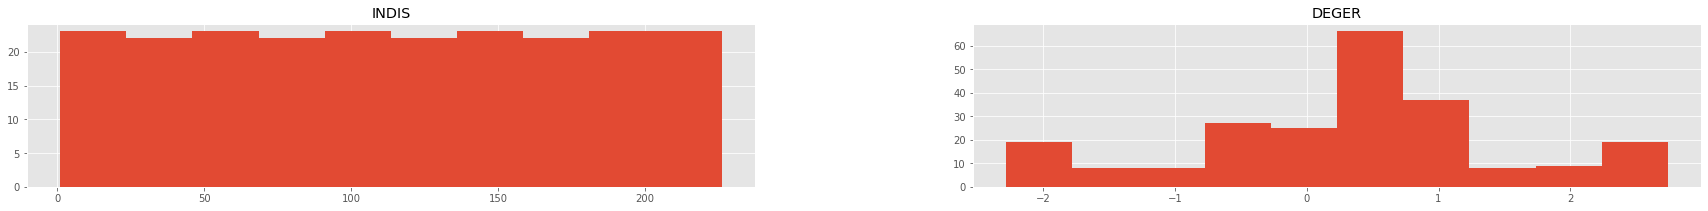

In [3]:
anamoly=data.describe().columns
print(anamoly)
print("Anamoly Değişkenleri Görselleştirmesi", "\n")
plt.style.use("ggplot")
data.hist(column=anamoly,figsize=(30,3))
plt.show()

In [4]:
data.describe()

,INDIS,DEGER
count,226.000000,226.000000
mean,113.500000,0.309867
std,65.384759,1.197338
min,1.000000,-2.280000
25%,57.250000,-0.357500
50%,113.500000,0.450000
75%,169.750000,0.910000
max,226.000000,2.740000


In [5]:
# Veri setimiz iki kolondan oluşuyor, bu yüzden "DEGER" kolonunu seçip bir diziye aktaracağız:

b_col = data['DEGER'].values  # Bir sözlüğün değerlerini ise values() metodu verir:

#Gördüğünüz gibi, bu metottan bir dict_values nesnesi alıyoruz. values() metodu bu çıktıyı başka veri tiplerine dönüştürme imkanına sağlamaktadır.


In [6]:
b_col

array([ 0.74,  0.93,  1.11,  1.29,  1.44,  1.61,  1.76,  1.82,  1.99,
        2.13,  2.27,  2.36,  2.41,  2.56,  2.58,  2.67,  2.71,  2.74,
        2.7 ,  2.74,  2.66,  2.66,  2.64,  2.61,  2.57,  2.52,  2.39,
        2.32,  2.25,  2.12,  2.06,  1.95,  1.85,  1.71,  1.65,  1.49,
        1.37,  1.27,  1.16,  1.12,  1.05,  0.93,  0.82,  0.73,  0.72,
        0.63,  0.54,  0.54,  0.5 ,  0.44,  0.42,  0.35,  0.38,  0.37,
        0.41,  0.4 ,  0.39,  0.45,  0.39,  0.45,  0.46,  0.52,  0.52,
        0.57,  0.57,  0.64,  0.65,  0.68,  0.66,  0.7 ,  0.7 ,  2.12,
        0.63,  0.6 ,  0.61,  0.54,  0.49,  0.46,  0.41,  0.37,  0.23,
        0.19,  0.11,  0.03, -0.09, -0.21, -0.36, -0.47, -0.58, -0.69,
       -0.86, -0.99, -1.04, -1.16, -1.28, -1.44, -1.53, -1.64, -1.72,
       -1.89, -1.95, -1.98, -2.07, -2.17, -2.13, -2.25, -2.25, -2.28,
       -2.2 , -2.19, -2.25, -2.19, -2.16, -2.02, -2.01, -1.87, -1.85,
       -1.68, -1.62, -1.51, -2.12, -1.22, -1.06, -0.99, -0.82, -0.64,
       -0.49, -0.4 ,

## Feature Scaling 

### Normalizasyon için python’da sklearn kütüphanesinden StandardScaler yüklememiz gereklidir. data veri setindeki sayısal değerleri StandartScaler ile –1 ile 1 aralığına dönüştürebiliriz.


In [7]:
# Z-score'u hesaplamak için Scikit-learn kütüphanesinden StandardScaler'ı kullanacağız.


kolon=data.columns # önce sütun adlarını al
from sklearn.preprocessing import StandardScaler

#Ölçeklenecek nesneyi oluşturalım
scaler = StandardScaler() 
# Değişkenleri, ortalaması 0 std sapması 1 olan bir dağılıma çeviriyor. 
#Böylelikle veri setindeki tüm gözlem birimleri -1 ile 1 arasında değer almış oluyor. z = (x — u) / s

b_col_scaled = scaler.fit_transform(b_col.reshape(-1,1))
#b_col dizisini 2D bir diziye dönüştürmemiz gerekiyor çünkü "StandardScaler" sadece 2D dizilerle çalışmaktadır

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
#Z-score'ları hesaplamak için NumPy kütüphanesini kullanacağız.

import numpy as np

z_scores = np.abs(b_col_scaled)

In [9]:
threshold = 2.5

anomaly_mask = z_scores > threshold

anomaly_indices = np.where(anomaly_mask)[0]

anomaly_values = b_col[anomaly_indices]

In [10]:
import matplotlib.pyplot as plt


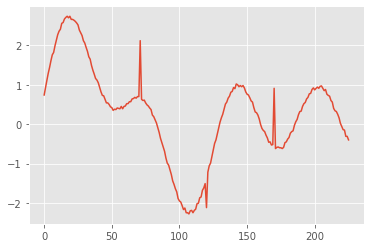

In [11]:
plt.plot(data['DEGER'])
anomaly_mask = z_scores > threshold
anomaly_indices = np.where(anomaly_mask)[0]
anomaly_values = b_col[anomaly_indices]

plt.scatter(anomaly_indices, anomaly_values, color='red')

# One-Class SVM 

In [12]:
from sklearn.svm import OneClassSVM
import pandas as pd

# Veri setini yükle
df = pd.read_excel("/Users/ideakadikoy/Desktop/anomali_data.xlsx")

In [13]:
# X matrisini hazırla
X = df.values

In [14]:
# One-Class SVM modelini tanımla
svm_model = OneClassSVM(kernel='rbf', degree=3, nu=0.05, gamma=0.1)

In [15]:
# Modeli eğit
svm_model.fit(X)


OneClassSVM(gamma=0.1, nu=0.05)

In [16]:
# Veri setindeki her bir gözlemi, One-Class SVM modeliyle tahmin et
y_pred = svm_model.predict(X)
print(y_pred)

[-1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1
 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1 -1
  1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1
 -1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1
 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1
 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1
  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1 -1]


In [17]:
# Tahmin sonuçlarını DataFrame'e aktar
result_df = pd.DataFrame({'anomali': y_pred, 'veri': data['DEGER']})

In [18]:
# Anomali gözlemleri filtrele
anomaly_df = result_df.loc[result_df['anomali'] == -1]

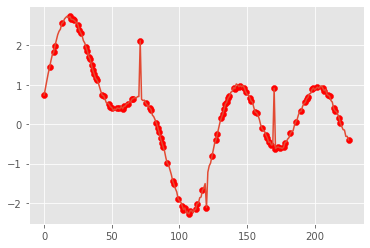

In [19]:
# Anomali gözlemleri görselleştir
import matplotlib.pyplot as plt

plt.plot(df['DEGER'])
plt.scatter(anomaly_df.index, anomaly_df['veri'], color='red')
plt.show()